#  Small Multiples

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#Switch to Jupyter Notebook mode of matplotlib
%matplotlib inline              

In [2]:
df = pd.read_csv('./soccer.csv')  # Load the dataset

In [3]:
# Inspect the dataset 
# See https://pandas.pydata.org/pandas-docs/stable/reference/frame.html
df.dtypes # No semicolon to see the output in the notebook

player             object
age                 int64
current_club       object
current_league     object
foot               object
height              int64
nationality        object
position           object
games12           float64
games13           float64
games14           float64
games15           float64
games16           float64
games17           float64
goals12           float64
goals13           float64
goals14           float64
goals15           float64
goals16           float64
goals17           float64
minutes12         float64
minutes13         float64
minutes14         float64
minutes15         float64
minutes16         float64
minutes17         float64
assists12         float64
assists13         float64
assists14         float64
assists15         float64
assists16         float64
assists17         float64
dtype: object

In [4]:
# Take a glimpse into the data
df.head() # No semicolon to see the output in the notebook

,player,age,current_club,current_league,foot,height,nationality,position,games12,games13,...,minutes14,minutes15,minutes16,minutes17,assists12,assists13,assists14,assists15,assists16,assists17
0,Dmitri Poloz,26,Zenit St. Petersburg,RUS - Premier Liga,right,183,Russia,W,22.0,30.0,...,1522.0,2132.0,2987.0,1194.0,1.0,4.0,2.0,6.0,8.0,7.0
1,Emiliano Rigoni,25,Zenit St. Petersburg,RUS - Premier Liga,both,180,Argentina Italy,W,NaN,26.0,...,2832.0,1533.0,2427.0,1433.0,NaN,0.0,6.0,6.0,2.0,3.0
2,Sebastián Driussi,22,Zenit St. Petersburg,RUS - Premier Liga,both,179,Argentina Italy,CF,NaN,7.0,...,2231.0,914.0,2517.0,1571.0,NaN,0.0,4.0,1.0,3.0,4.0
3,Aleksandr Kokorin,26,Zenit St. Petersburg,RUS - Premier Liga,right,183,Russia,CF,26.0,23.0,...,2785.0,1424.0,2889.0,2911.0,5.0,9.0,7.0,3.0,7.0,4.0
4,Anton Zabolotnyi,26,Zenit St. Petersburg,RUS - Premier Liga,right,188,Russia,CF,5.0,26.0,...,NaN,1500.0,2562.0,2019.0,0.0,1.0,NaN,3.0,5.0,2.0


## Task
### Small Multiples
Group the players by their current league and plot the age distribution of each league in a small multiples visualisation.

See: [pandas groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html#pandas.DataFrame.groupby), [pandas hist](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.hist.html),[matplotlib subplot](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.subplot.html), [matplotlib get_shared_x/y_axes](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.axes.Axes.get_shared_x_axes.html) (and the [Grouper object](https://matplotlib.org/3.1.0/api/cbook_api.html#matplotlib.cbook.Grouper) it reutrns).

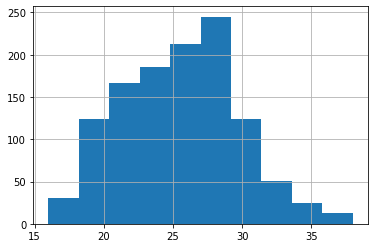

In [5]:
# Single Histogram
df['age'].hist();

In [6]:
# List all leagues
len(df['current_league'].unique());  # = 10
df['current_league'].unique()

array(['RUS - Premier Liga', 'ESP - LaLiga', 'NLD - Eredivisie',
       'GBR - Premier League', 'TUR - Süper Lig', 'GRC - Super League',
       'FRA - Ligue 1', 'ITA - Serie A', 'BEL - Jupiler Pro League',
       'PRT - Liga NOS'], dtype=object)

#### Using Matplotlib

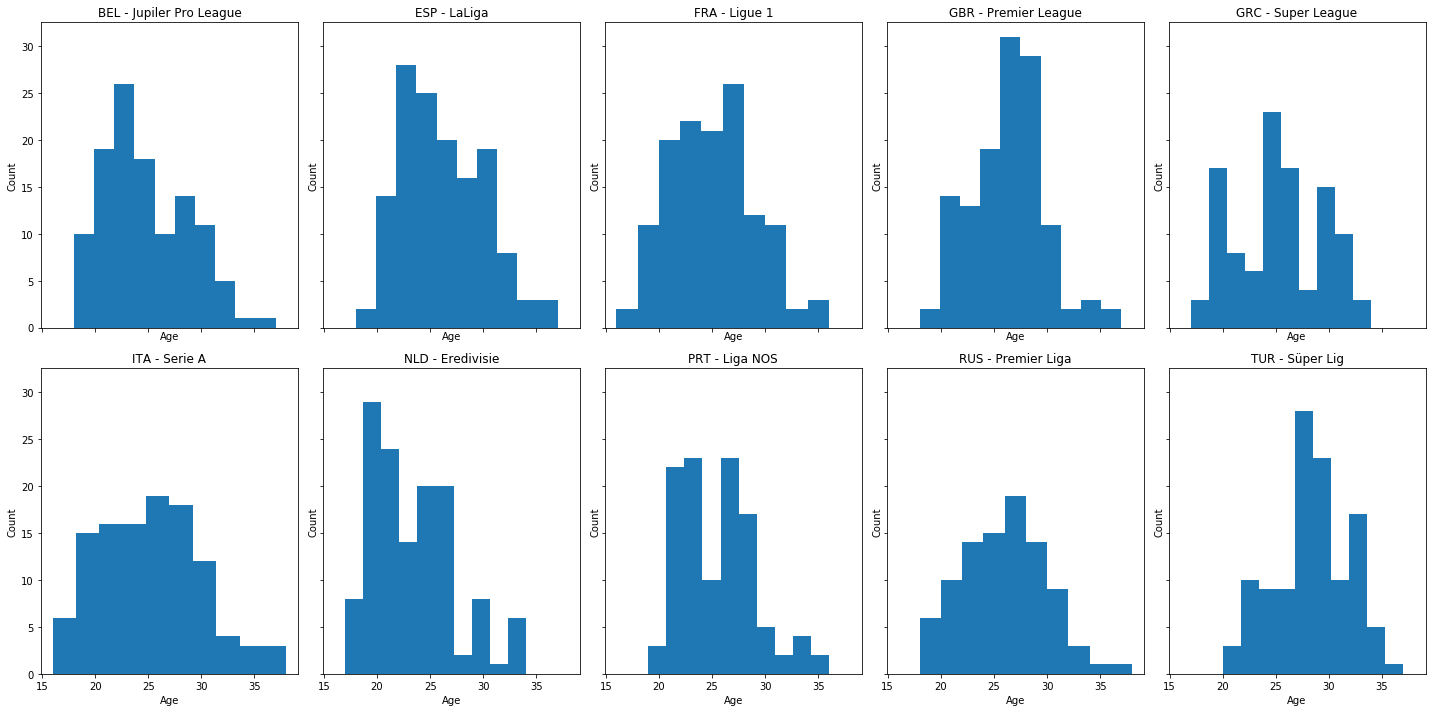

In [7]:
fig, ax = plt.subplots(2, 5, figsize=(20,10), sharex=True, sharey=True)

plot_no = 0  # index for subplots

for league, selection in df.groupby('current_league'):  # Group the data by league and iterate over groups
    ax.flatten()[plot_no].hist(selection['age'])
    ax.flatten()[plot_no].set(xlabel='Age',
                               ylabel='Count',
                               title=league)
    plot_no = plot_no + 1

plt.tight_layout()

#### Using Pandas + Matplotlib

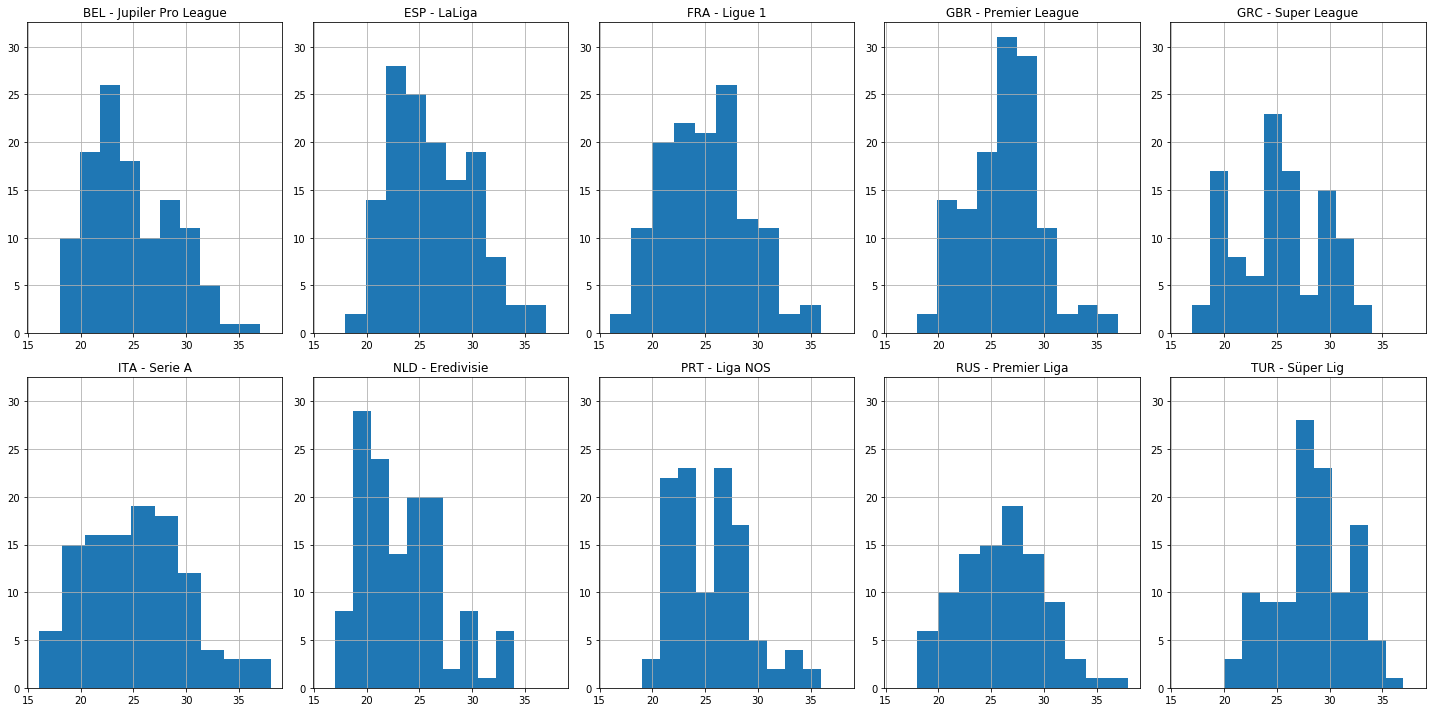

In [8]:
plt.figure(figsize=(20,10))  # Larger than default
plot_no = 1  # index for subplots
axes = []  # to store the subplot axes

for league, selection in df.groupby('current_league'):  # Group the data by league and iterate over groups
    ax = plt.subplot(2, 5, plot_no); # 2 rows, 5 columns
    selection['age'].hist();
    ax.set_title(league);
    axes.append(ax);
    plot_no = plot_no + 1

# Make sure that the plots share x & y axis so that the histograms are comparable!
axes[0].get_shared_x_axes().join(*axes)
axes[0].get_shared_y_axes().join(*axes)

# Update the scales
for ax in axes:
    ax.autoscale();

plt.tight_layout()


## Submission
Please make a screenshot of your visualisation and submit it.